In [1]:
import torch
import geospaNN
import numpy as np
import time
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

path = '../data/Output/'

R[write to console]: Loading required package: BRISC

R[write to console]: Loading required package: RANN

R[write to console]: Loading required package: parallel

R[write to console]: Loading required package: rdist

R[write to console]: Loading required package: matrixStats

R[write to console]: Loading required package: pbapply

R[write to console]: The ordering of inputs x (covariates) and y (response) in BRISC_estimation has been changed BRISC 1.0.0 onwards.
  Please check the new documentation with ?BRISC_estimation.



R package: BRISC installed


/Users/zhanwentao/opt/anaconda3/envs/NN/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
def f1(X): return 10 * np.sin(np.pi * 2 * X)


sigma = 1
phi = 0.1
tau = 0.01
theta = torch.tensor([sigma, phi / np.sqrt(2), tau])

p = 1;
funXY = f1

n = 1000
nn = 20
batch_size = 50

torch.manual_seed(2025)
_, _, _, _, X = geospaNN.Simulation(n, p, nn, funXY, torch.tensor([1, 5, 0.01]), range=[0, 1])
X = X.reshape(-1,1)
X = (X - X.min())/(X.max() - X.min())
torch.manual_seed(2025)
_, _, coord, cov, corerr = geospaNN.Simulation(n, p, nn, funXY, theta, range=[0, 1])
Y = funXY(X).reshape(-1) + corerr

torch.manual_seed(2024)
np.random.seed(0)
data_train, data_val, data_test = geospaNN.split_data(X, Y, coord, neighbor_size=nn,
                                                      test_proportion=0.2)

In [3]:
torch.manual_seed(2025)
mlp_nn = torch.nn.Sequential(
    torch.nn.Linear(p, 5),
    torch.nn.ReLU(),
    torch.nn.Linear(5, 1)
)
trainer_nn = geospaNN.nn_train(mlp_nn, lr=0.01, min_delta=0.001)
training_log = trainer_nn.train(data_train, data_val, data_test)
theta0 = geospaNN.theta_update(mlp_nn(data_train.x).squeeze() - data_train.y, data_train.pos, neighbor_size=20)

Epoch 00087: reducing learning rate of group 0 to 5.0000e-03.
INFO: Early stopping
End at epoch90
---------------------------------------- 
	Ordering Coordinates 
----------------------------------------
	Model description
----------------------------------------
BRISC model fit with 600 observations.

Number of covariates 1 (including intercept if specified).

Using the exponential spatial correlation model.

Using 15 nearest neighbors.



Source not compiled with OpenMP support.
----------------------------------------
	Building neighbor index
----------------------------------------
	Performing optimization
----------------------------------------
	Processing optimizers
----------------------------------------
Theta estimated as
[ 4.46709011 29.13369467  0.06201334]


In [4]:
torch.manual_seed(2025)
mlp_linear = torch.nn.Sequential(
    torch.nn.Linear(p, 1),
)
model_linear = geospaNN.nngls(p=p, neighbor_size=nn, coord_dimensions=2, mlp=mlp_linear, theta = torch.tensor(theta0))
trainer_linear = geospaNN.nngls_train(model_linear, lr=0.01, min_delta=0.001)
training_log = trainer_linear.train(data_train, data_val, data_test,
                                        Update_init=10, Update_step=5)

---------------------------------------- 
	Ordering Coordinates 
----------------------------------------
	Model description
----------------------------------------
BRISC model fit with 600 observations.

Number of covariates 1 (including intercept if specified).

Using the exponential spatial correlation model.

Using 15 nearest neighbors.



Source not compiled with OpenMP support.
----------------------------------------
	Building neighbor index
----------------------------------------
	Performing optimization
----------------------------------------
	Processing optimizers
----------------------------------------
Theta estimated as
[3.66531100e+01 1.28415414e+01 1.00000000e-03]
to
[3.66531100e+01 1.28415414e+01 1.00000000e-03]
---------------------------------------- 
	Ordering Coordinates 
----------------------------------------
	Model description
----------------------------------------
BRISC model fit with 600 observations.

Number of covariates 1 (including intercept if specif

In [5]:
torch.manual_seed(2025)
mlp_l1_n5 = torch.nn.Sequential(
    torch.nn.Linear(p, 5),
    torch.nn.ReLU(),
    torch.nn.Linear(5, 1)
)
nngls_l1_n5 = geospaNN.nngls(p=p, neighbor_size=nn, coord_dimensions=2, mlp=mlp_l1_n5, theta=torch.tensor(theta0))
trainer_l1_n5 = geospaNN.nngls_train(nngls_l1_n5, lr=0.1, min_delta=0.001)
training_log = trainer_l1_n5.train(data_train, data_val, data_test,
                                   Update_init=20, Update_step=5, seed = 2024)

Epoch 00011: reducing learning rate of group 0 to 5.0000e-02.
INFO: Early stopping
End at epoch14


In [6]:
torch.manual_seed(2025)
mlp_l1_n20 = torch.nn.Sequential(
    torch.nn.Linear(p, 20),
    torch.nn.ReLU(),
    torch.nn.Linear(20, 1)
)
nngls_l1_n20 = geospaNN.nngls(p=p, neighbor_size=nn, coord_dimensions=2, mlp=mlp_l1_n20, 
                              theta=torch.tensor(theta0))
trainer_l1_n20 = geospaNN.nngls_train(nngls_l1_n20, lr=0.01, min_delta=0.001)
training_log = trainer_l1_n20.train(data_train, data_val, data_test,
                                    Update_init=20, Update_step=5, seed = 2024)

---------------------------------------- 
	Ordering Coordinates 
----------------------------------------
	Model description
----------------------------------------
BRISC model fit with 600 observations.

Number of covariates 1 (including intercept if specified).

Using the exponential spatial correlation model.

Using 15 nearest neighbors.



Source not compiled with OpenMP support.
----------------------------------------
	Building neighbor index
----------------------------------------
	Performing optimization
----------------------------------------
	Processing optimizers
----------------------------------------
Theta estimated as
[5.88062716e+00 3.57743428e+01 2.36704944e-03]
to
[5.88062716e+00 3.57743428e+01 2.36704944e-03]
---------------------------------------- 
	Ordering Coordinates 
----------------------------------------
	Model description
----------------------------------------
BRISC model fit with 600 observations.

Number of covariates 1 (including intercept if specif

In [7]:
torch.manual_seed(2025)
mlp_l1_n50 = torch.nn.Sequential(
    torch.nn.Linear(p, 50),
    torch.nn.ReLU(),
    torch.nn.Linear(50, 1)
)
nngls_l1_n50 = geospaNN.nngls(p=p, neighbor_size=nn, coord_dimensions=2, mlp=mlp_l1_n50, 
                              theta=torch.tensor(theta0))
trainer_l1_n50 = geospaNN.nngls_train(nngls_l1_n50, lr=0.1, min_delta=0.001)
training_log = trainer_l1_n50.train(data_train, data_val, data_test,
                                    Update_init=10, Update_step=5, seed = 2024)

---------------------------------------- 
	Ordering Coordinates 
----------------------------------------
	Model description
----------------------------------------
BRISC model fit with 600 observations.

Number of covariates 1 (including intercept if specified).

Using the exponential spatial correlation model.

Using 15 nearest neighbors.



Source not compiled with OpenMP support.
----------------------------------------
	Building neighbor index
----------------------------------------
	Performing optimization
----------------------------------------
	Processing optimizers
----------------------------------------
Theta estimated as
[ 2.79258222 17.18266549  0.09962068]
to
[ 2.79258222 17.18266549  0.09962068]
---------------------------------------- 
	Ordering Coordinates 
----------------------------------------
	Model description
----------------------------------------
BRISC model fit with 600 observations.

Number of covariates 1 (including intercept if specified).

Using the e

In [8]:
torch.manual_seed(2025)
mlp_l2_n5_2 = torch.nn.Sequential(
    torch.nn.Linear(p, 5),
    torch.nn.ReLU(),
    torch.nn.Linear(5, 2),
    torch.nn.ReLU(),
    torch.nn.Linear(2, 1)
)
nngls_l2_n5_2 = geospaNN.nngls(p=p, neighbor_size=nn, coord_dimensions=2, mlp=mlp_l2_n5_2, theta=torch.tensor(theta0))
trainer_l2_n5_2 = geospaNN.nngls_train(nngls_l2_n5_2, lr=0.1, min_delta=0.001)
training_log = trainer_l2_n5_2.train(data_train, data_val, data_test,
                                     Update_init=10, Update_step=5, seed = 2024)

---------------------------------------- 
	Ordering Coordinates 
----------------------------------------
	Model description
----------------------------------------
BRISC model fit with 600 observations.

Number of covariates 1 (including intercept if specified).

Using the exponential spatial correlation model.

Using 15 nearest neighbors.



Source not compiled with OpenMP support.
----------------------------------------
	Building neighbor index
----------------------------------------
	Performing optimization
----------------------------------------
	Processing optimizers
----------------------------------------
Theta estimated as
[ 1.56564636 32.46819286  0.20452155]
to
[ 1.56564636 32.46819286  0.20452155]
---------------------------------------- 
	Ordering Coordinates 
----------------------------------------
	Model description
----------------------------------------
BRISC model fit with 600 observations.

Number of covariates 1 (including intercept if specified).

Using the e

In [9]:
torch.manual_seed(2025)
mlp_l2_n50_20 = torch.nn.Sequential(
    torch.nn.Linear(p, 50),
    torch.nn.ReLU(),
    torch.nn.Linear(50, 20),
    torch.nn.ReLU(),
    torch.nn.Linear(20, 1)
)
nngls_l2_n50_20 = geospaNN.nngls(p=p, neighbor_size=nn, coord_dimensions=2, mlp=mlp_l2_n50_20, theta=torch.tensor(theta0))
trainer_l2_n50_20 = geospaNN.nngls_train(nngls_l2_n50_20, lr=0.1, min_delta=0.001)
training_log = trainer_l2_n50_20.train(data_train, data_val, data_test,
                                       Update_init=10, Update_step=5, seed = 2024)

---------------------------------------- 
	Ordering Coordinates 
----------------------------------------
	Model description
----------------------------------------
BRISC model fit with 600 observations.

Number of covariates 1 (including intercept if specified).

Using the exponential spatial correlation model.

Using 15 nearest neighbors.



Source not compiled with OpenMP support.
----------------------------------------
	Building neighbor index
----------------------------------------
	Performing optimization
----------------------------------------
	Processing optimizers
----------------------------------------
Theta estimated as
[ 0.80981676 25.30265946  0.24330683]
to
[ 0.80981676 25.30265946  0.24330683]
---------------------------------------- 
	Ordering Coordinates 
----------------------------------------
	Model description
----------------------------------------
BRISC model fit with 600 observations.

Number of covariates 1 (including intercept if specified).

Using the e

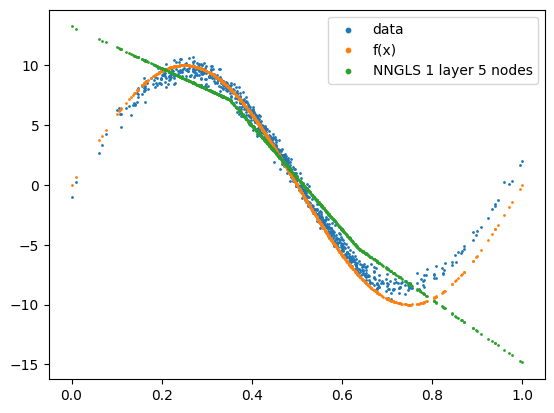

In [10]:
plt.clf()
plt.scatter(X.detach().numpy(), Y.detach().numpy(), s=1, label='data')
plt.scatter(X.detach().numpy(), funXY(X.detach().numpy()), s=1, label='f(x)')
plt.scatter(X.detach().numpy(), mlp_l1_n5(X).detach().numpy(), s=1, label='NNGLS 1 layer 5 nodes')
#plt.scatter(X.detach().numpy(), mlp_l1_n20(X).detach().numpy(), s=1, label='NNGLS 1 layer 20 nodes')
#plt.scatter(X.detach().numpy(), mlp_l1_n50(X).detach().numpy(), s=1, label='NNGLS 1 layer 50 nodes')
lgnd = plt.legend()
for handle in lgnd.legend_handles:
    handle.set_sizes([10.0])
plt.savefig(path + 'l1n5.png')

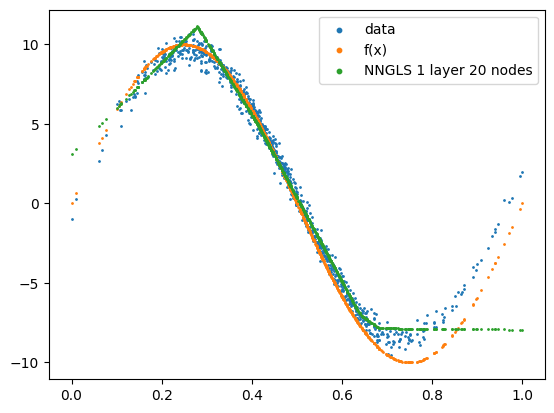

In [11]:
plt.clf()
plt.scatter(X.detach().numpy(), Y.detach().numpy(), s=1, label='data')
plt.scatter(X.detach().numpy(), funXY(X.detach().numpy()), s=1, label='f(x)')
#plt.scatter(X.detach().numpy(), mlp_l1_n5(X).detach().numpy(), s=1, label='NNGLS 1 layer 5 nodes')
plt.scatter(X.detach().numpy(), mlp_l1_n20(X).detach().numpy(), s=1, label='NNGLS 1 layer 20 nodes')
#plt.scatter(X.detach().numpy(), mlp_l1_n50(X).detach().numpy(), s=1, label='NNGLS 1 layer 50 nodes')
lgnd = plt.legend()
for handle in lgnd.legend_handles:
    handle.set_sizes([10.0])
plt.savefig(path + 'l1n20.png')

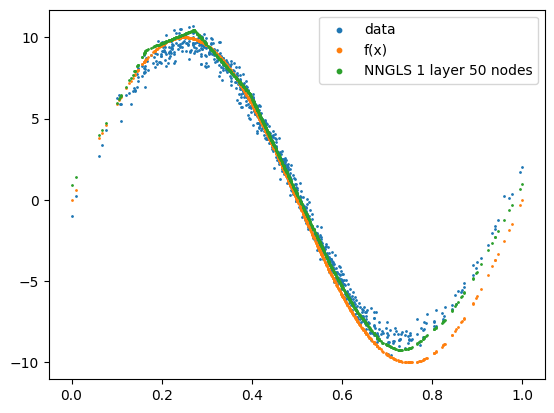

In [12]:
plt.clf()
plt.scatter(X.detach().numpy(), Y.detach().numpy(), s=1, label='data')
plt.scatter(X.detach().numpy(), funXY(X.detach().numpy()), s=1, label='f(x)')
#plt.scatter(X.detach().numpy(), mlp_l1_n5(X).detach().numpy(), s=1, label='NNGLS 1 layer 5 nodes')
#plt.scatter(X.detach().numpy(), mlp_l1_n20(X).detach().numpy(), s=1, label='NNGLS 1 layer 20 nodes')
plt.scatter(X.detach().numpy(), mlp_l1_n50(X).detach().numpy(), s=1, label='NNGLS 1 layer 50 nodes')
lgnd = plt.legend()
for handle in lgnd.legend_handles:
    handle.set_sizes([10.0])
plt.savefig(path + 'l1n50.png')

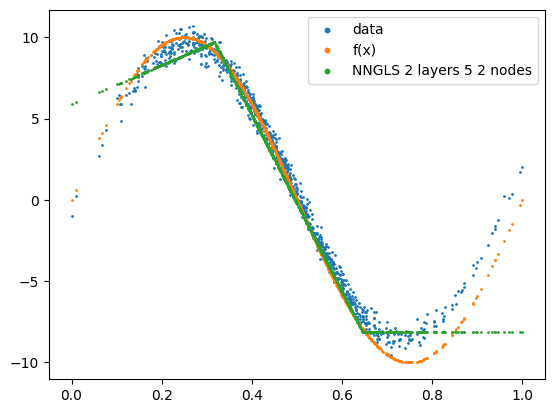

In [13]:
plt.clf()
plt.scatter(X.detach().numpy(), Y.detach().numpy(), s=1, label='data')
plt.scatter(X.detach().numpy(), funXY(X.detach().numpy()), s=1, label='f(x)')
plt.scatter(X.detach().numpy(), mlp_l2_n5_2(X).detach().numpy(), s=1, label='NNGLS 2 layers 5 2 nodes')
#plt.scatter(X.detach().numpy(), mlp_l2_n50_20(X).detach().numpy(), s=1, label='NNGLS 2 layers 50 20 nodes')
lgnd = plt.legend()
for handle in lgnd.legend_handles:
    handle.set_sizes([10.0])
plt.savefig(path + 'l2n5_2.png')

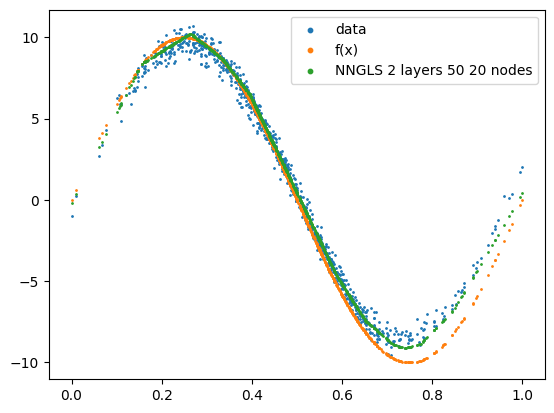

In [14]:
plt.clf()
plt.scatter(X.detach().numpy(), Y.detach().numpy(), s=1, label='data')
plt.scatter(X.detach().numpy(), funXY(X.detach().numpy()), s=1, label='f(x)')
#plt.scatter(X.detach().numpy(), mlp_l2_n5_2(X).detach().numpy(), s=1, label='NNGLS 2 layers 5 2 nodes')
plt.scatter(X.detach().numpy(), mlp_l2_n50_20(X).detach().numpy(), s=1, label='NNGLS 2 layers 50 20 nodes')
lgnd = plt.legend()
for handle in lgnd.legend_handles:
    handle.set_sizes([10.0])
plt.savefig(path + 'l2n50_20.png')

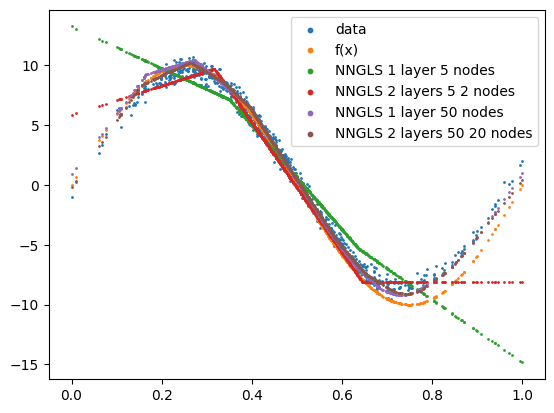

In [15]:
plt.clf()
plt.scatter(X.detach().numpy(), Y.detach().numpy(), s=1, label='data')
plt.scatter(X.detach().numpy(), funXY(X.detach().numpy()), s=1, label='f(x)')
plt.scatter(X.detach().numpy(), mlp_l1_n5(X).detach().numpy(), s=1, label='NNGLS 1 layer 5 nodes')
plt.scatter(X.detach().numpy(), mlp_l2_n5_2(X).detach().numpy(), s=1, label='NNGLS 2 layers 5 2 nodes')
plt.scatter(X.detach().numpy(), mlp_l1_n50(X).detach().numpy(), s=1, label='NNGLS 1 layer 50 nodes')
plt.scatter(X.detach().numpy(), mlp_l2_n50_20(X).detach().numpy(), s=1, label='NNGLS 2 layers 50 20 nodes')
lgnd = plt.legend()
for handle in lgnd.legend_handles:
    handle.set_sizes([10.0])
plt.show()